In [ ]:
from sklearn.datasets import make_moons          # Importing the library for the dataset

In [ ]:
x , y = make_moons(n_samples = 50000, noise=0.05, random_state = 42)  # Creation of the dataset

In [ ]:
x.shape , y.shape                # Here i checked the shape of the data and labels

# Data are splitted for training and testing
x_train , x_test = x[:45000] , x[45000:]
y_train , y_test = y[:45000] , y[45000:]

In [ ]:
from matplotlib import pyplot as plt           # Importing the library for plotting the created data

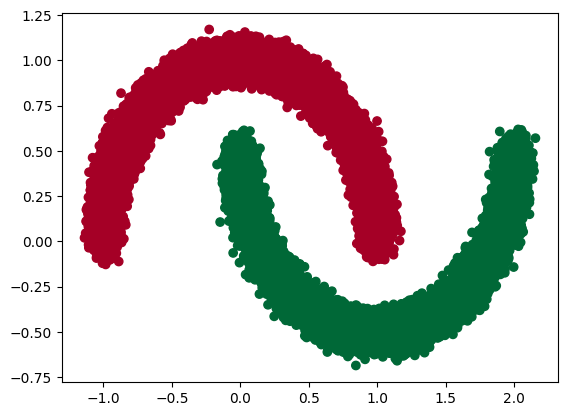

In [ ]:
plt.scatter( x[:,0] , x[:,1] , c = y , cmap = plt.cm.RdYlGn)  # plotting the data with labels

In [ ]:
import pandas as pd
values = pd.DataFrame({"X1 values" : x[:,0] , "X2 values" : x[:,1] , "Y values" : y})
values                  # using pandas the created dataset is tabulated for better understanding about the data

,X1 values,X2 values,Y values
0,0.556477,-0.352612,1
1,0.332323,0.956923,0
2,0.935677,0.009938,0
3,0.082458,1.029859,0
4,1.243774,-0.476109,1
...,...,...,...
49995,0.172751,0.995797,0
49996,1.813668,-0.075936,1
49997,1.165556,-0.474435,1
49998,0.980021,0.073284,0


Here let us start to build a DL model for the purpose of binary classification of the above dataset

In [ ]:
# Let us build the binary classification model

import tensorflow as tf            # Importing tensorflow as tf

# Step - 1. Set the random seed for data reproducibility
tf.random.set_seed(42)

# Step - 2. Build the Model ( Here i have build a model with minimum number of parameters to check how the model works )
Moon_classifier_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (2,) ),
    tf.keras.layers.Dense(4 , activation = "relu" ),
    tf.keras.layers.Dense(1 , activation = "sigmoid")
])

# Step - 3. Compiling the model with suitable loss function and optimizers ( let us also develop a lr scheduler to find optimum learning rate)
Moon_classifier_1.compile(loss = "binary_crossentropy",
                         optimizer = "Adam",
                         metrics = ["accuracy"])

optimal_learning_rate = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20) )

classifier1_results = Moon_classifier_1.fit(x_train , y_train , epochs = 100 , callbacks = [optimal_learning_rate])

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7438 - loss: 0.5342 - learning_rate: 1.0000e-04
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8421 - loss: 0.4612 - learning_rate: 1.1220e-04
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8553 - loss: 0.3879 - learning_rate: 1.2589e-04
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8640 - loss: 0.3262 - learning_rate: 1.4125e-04
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8732 - loss: 0.2858 - learning_rate: 1.5849e-04
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8808 - loss: 0.2594 - learning_rate: 1.7783e-04
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8860 - loss: 0.2387 - learning_rate: 1.9953e-04
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8941 - loss: 0.2210 - learning_rate: 2.2387e-04
Epoch 9/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accurac

In [ ]:
# let us tabulate obtained loss , accuracy and learning rate after training

values = pd.DataFrame({"Loss" : classifier1_results.history["loss"] , "Accuracy" : classifier1_results.history["accuracy"] , "Learning Rate" : classifier1_results.history["learning_rate"]})
values

,Loss,Accuracy,Learning Rate
0,0.516975,0.788222,0.000100
1,0.444485,0.845800,0.000112
2,0.372252,0.855978,0.000126
3,0.316270,0.865222,0.000141
4,0.280126,0.874022,0.000158
...,...,...,...
95,0.767378,0.497778,5.623413
96,0.773420,0.495911,6.309574
97,0.783135,0.496578,7.079458
98,0.797628,0.499200,7.943282


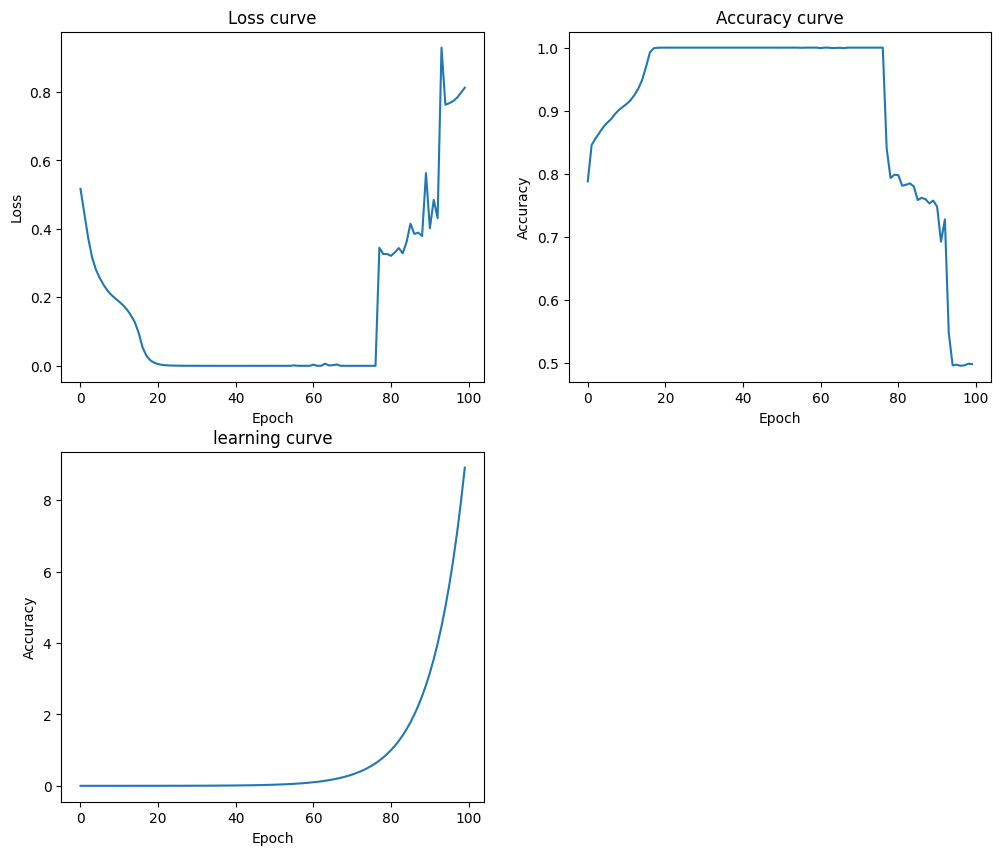

In [ ]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
plt.title("Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
values['Loss'].plot()
plt.subplot(2,2,2)
plt.title("Accuracy curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
values['Accuracy'].plot()
plt.subplot(2,2,3)
plt.title("learning curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
values['Learning Rate'].plot()
plt.show()

Text(0.5, 1.0, 'Loss vs Learning Rate')

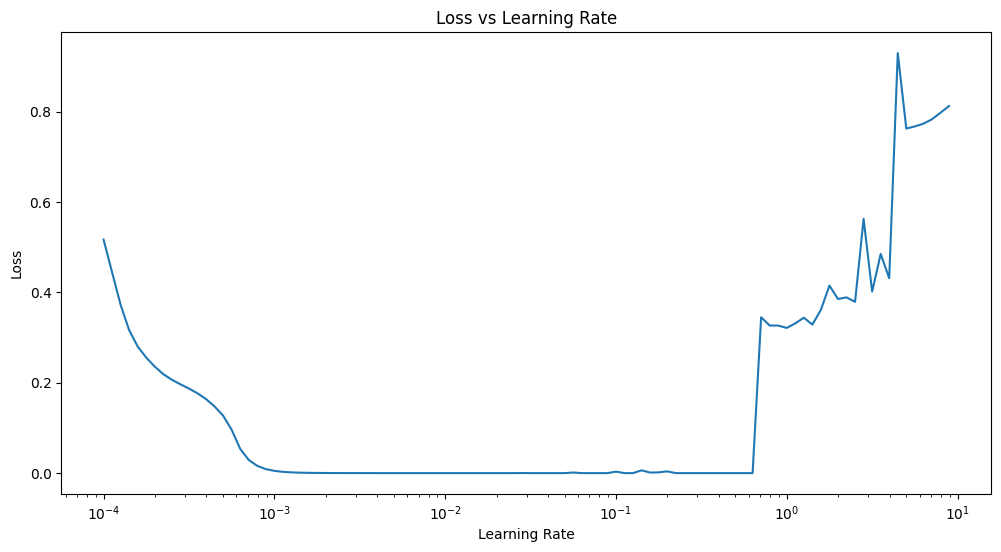

In [77]:
# let us plot the loss vs learning rate curve to find the better learning rate
plt.figure(figsize = (12,6))
lrs = 1e-4 * ( 10 ** (tf.range(100)/20))
plt.semilogx(values['Learning Rate'], values['Loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss vs Learning Rate")

From the above we conclude that learning rate of 10**-2 is more suitable for this particular classification task. Now let us re-build the model

In [78]:
# Let us re-build the binary classification model

import tensorflow as tf            # Importing tensorflow as tf

# Step - 1. Set the random seed for data reproducibility
tf.random.set_seed(42)

# Step - 2. Build the Model (Here i have re-build a model with modified learning rate)

Moon_classifier_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (2,) ),
    tf.keras.layers.Dense(4 , activation = "relu" ),
    tf.keras.layers.Dense(1 , activation = "sigmoid")
])

# Step - 3. Compiling the model
Moon_classifier_2.compile(loss = "binary_crossentropy",
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics = ["accuracy"])


classifier1_results_1 = Moon_classifier_2.fit(x_train , y_train , epochs = 100)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8732 - loss: 0.2914
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8980 - loss: 0.2002
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8981 - loss: 0.1999
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8982 - loss: 0.1996
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8984 - loss: 0.1994
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8982 - loss: 0.1992
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8986 - loss: 0.1991
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8986 - loss: 0.1990
Epoch 9/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8985 - loss: 0.1990
Epoch 10/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8987 - loss: 0.1990
Epoch 11/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8986 - loss: 0.1989
Epoch 12/100
1407/1

In [79]:
# Now we can evaluate the model

loss , accuracy = Moon_classifier_2.evaluate(x_test , y_test)
print(f"The loss of the model is : {loss}")
print(f"The accuracy of the model is : {(accuracy*100):.2f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9035 - loss: 0.1992
The loss of the model is : 0.20322957634925842
The accuracy of the model is : 90.24


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Performing binary classification
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Performing binary classification


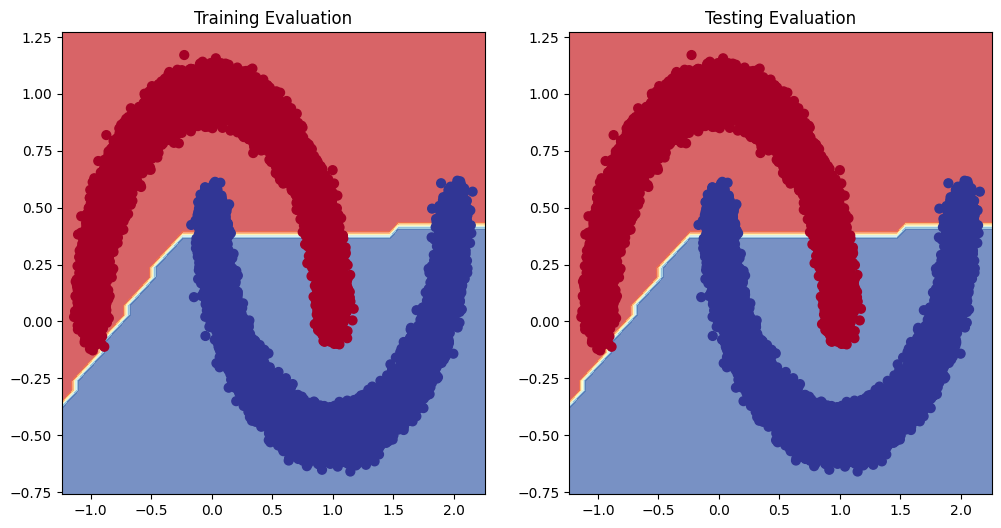

In [83]:
import numpy as np

def plot_decision_regions(model , x , y):
  x_min , x_max = x[:,0].min() - 0.1 , x[:,0].max() + 0.1
  y_min , y_max = x[:,1].min() - 0.1 , x[:,1].max() + 0.1
  xx , yy , = np.meshgrid(np.linspace(x_min,x_max),
                          np.linspace(y_min,y_max))
  x_in = np.c_[xx.ravel() , yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Multiclass classification")
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else :
    print("Performing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(x[:,0] , x[:,1] , c= y , s = 40 , cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min() , xx.max())
  plt.ylim(yy.min() , yy.max())



plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Training Evaluation")
plot_decision_regions(model = Moon_classifier_2 , x = x_train , y = y_train)
plt.subplot(1,2,2)
plt.title("Testing Evaluation")
plot_decision_regions(model = Moon_classifier_2 , x = x_train , y = y_train)
plt.show()

22500/22500 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step


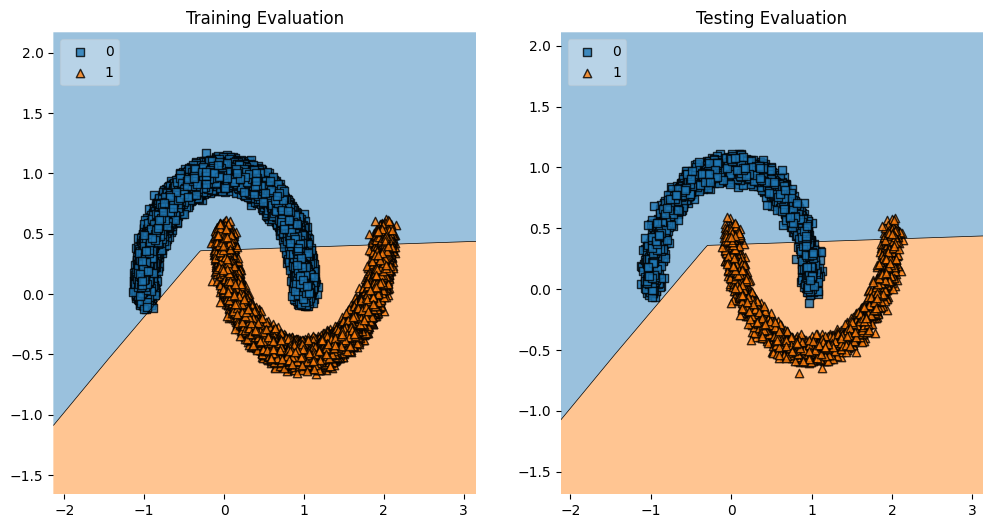

In [80]:
# Now we can create a function for the visualization of model performance over a specific data

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Training Evaluation")
plot_decision_regions(X=x_train, y=y_train, clf= Moon_classifier_2, legend=2)
plt.subplot(1,2,2)
plt.title("Testing Evaluation")
plot_decision_regions(X=x_test, y=y_test, clf= Moon_classifier_2, legend=2)
plt.show()

From the above graph we can come to know that optimization is required for the better performance of the model so let us optimize it by adding layers and increasing the number of neurons

In [84]:
# Building the optimized model

tf.random.set_seed(42)

Moon_classifier_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (2,) ),
    tf.keras.layers.Dense(16 , activation = "relu" ),
    tf.keras.layers.Dense(8 , activation = "relu" ),
    tf.keras.layers.Dense(1 , activation = "sigmoid")
])

Moon_classifier_3.compile(loss = "binary_crossentropy",
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics = ["accuracy"])

classifier1_results_2 = Moon_classifier_3.fit(x_train , y_train , epochs = 100)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9611 - loss: 0.0971
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 1.3138e-04
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 3.3908e-05
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 1.2660e-05
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 5.1579e-06
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 2.1839e-06
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 1.0130e-06
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 4.2127e-07
Epoch 9/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 1.9812e-07
Epoch 10/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 1.7982e-07
Epoch 11/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.000

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.5313e-12
The loss of the model is : 1.5426672092533344e-11
The accuracy of the model is : 100.00
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Performing binary classification
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Performing binary classification


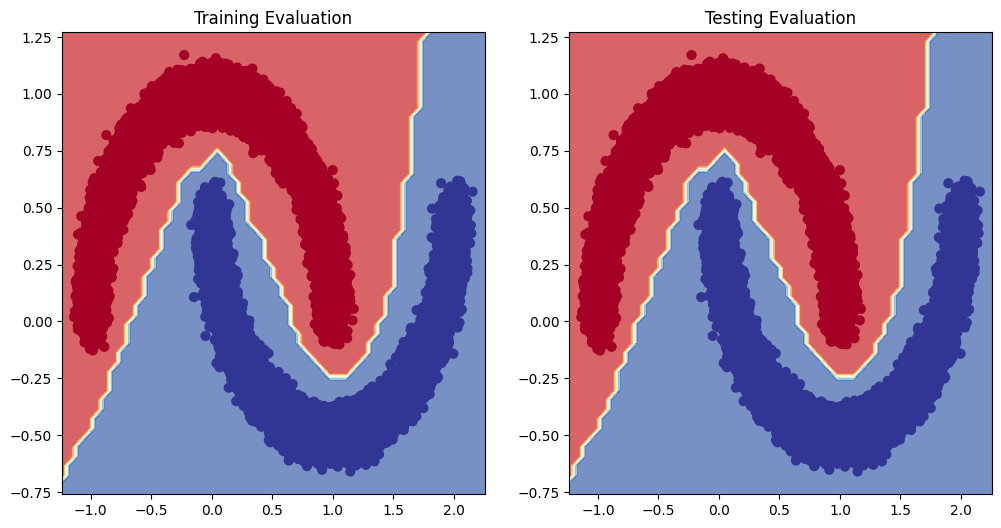

In [85]:
# repeating the above evaluation steps

loss , accuracy = Moon_classifier_3.evaluate(x_test , y_test)
print(f"The loss of the model is : {loss}")
print(f"The accuracy of the model is : {(accuracy*100):.2f}")

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Training Evaluation")
plot_decision_regions(model = Moon_classifier_3 , x = x_train , y = y_train)
plt.subplot(1,2,2)
plt.title("Testing Evaluation")
plot_decision_regions(model = Moon_classifier_3 , x = x_train , y = y_train)
plt.show()

22500/22500 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step


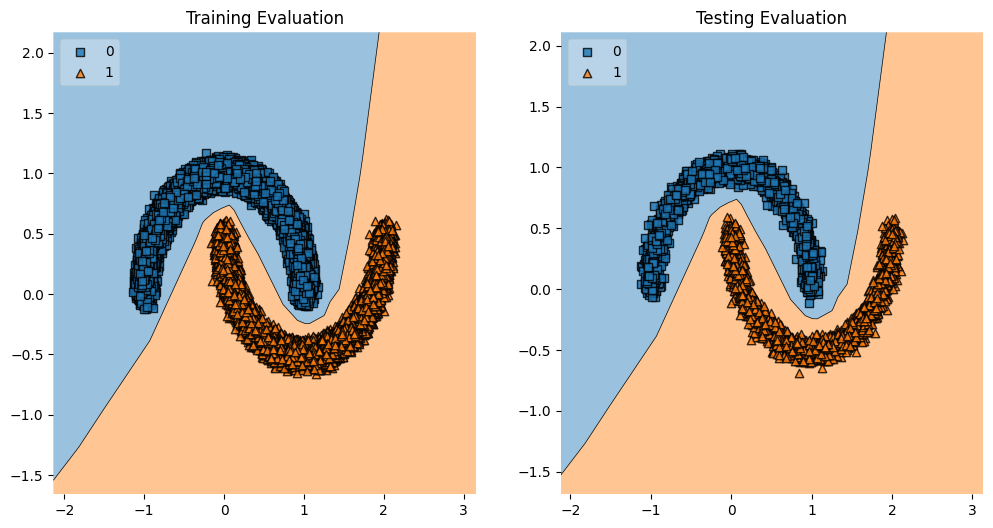

In [87]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Training Evaluation")
plot_decision_regions(X=x_train, y=y_train, clf= Moon_classifier_3, legend=2)
plt.subplot(1,2,2)
plt.title("Testing Evaluation")
plot_decision_regions(X=x_test, y=y_test, clf= Moon_classifier_3, legend=2)
plt.show()

In [89]:
# Finally with this let me the model

# 1. Saving the entire model
Moon_classifier_3.save('Moon_classifier_complete_model.h5')

# 2. Saving only the weights of the model
Moon_classifier_3.save_weights('Moon_classifier_weights.weights.h5')

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


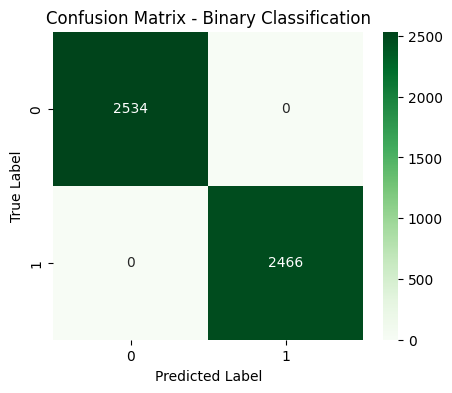

In [91]:
# let us plot the confusion matrix and calculate the necessary metrics

from sklearn.metrics import confusion_matrix ,accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

y_pred = Moon_classifier_3.predict(x_test)
y_pred = tf.round(y_pred)
my_confusion_matrix_1 = confusion_matrix(y_test , y_pred)
classess = my_confusion_matrix_1.shape[0]

plt.figure(figsize = (5,4))
sns.heatmap(my_confusion_matrix_1, annot=True, fmt='d', cmap='Greens',
            xticklabels= np.arange(classess),
            yticklabels= np.arange(classess))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Binary Classification')
plt.show()

In [92]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

In [93]:
print(f"Model has obtained an accuracy of {accuracy*100:.2f}%")
print(f"Model has obtained a precision of {precision*100:.2f}%")
print(f"Model has obtained a recall of {recall*100:.2f}%")
print(f"Model has obtained a f1 score of {f1*100:.2f}%")

Model has obtained an accuracy of 100.00%
Model has obtained a precision of 100.00%
Model has obtained a recall of 100.00%
Model has obtained a f1 score of 100.00%
